Parameter searching: https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv \
Renaming the last column: https://stackoverflow.com/questions/56479835/rename-only-the-last-column-in-pandas-dataframe-accounting-for-duplicate-header

Preperation

In [1]:
import pandas
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib as plt

c:\Users\victo\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import sklearn
print(sklearn.__version__)

1.0.2


In [2]:
#loading in dataset normal, STM and BerTopic
df = pandas.read_csv("G:\\Master\\Block 3\\Thesis\\JRPG\\JRPG_final.csv")
df_STM = pandas.read_csv("G:\\Master\\Block 3\\Thesis\\JRPG\\features_JRPG_STM.csv")
df_Bert = pandas.read_csv("G:\\Master\\Block 3\\Thesis\\JRPG\\features_JRPG_Bert_reduction.csv")
df_STM_selected = pandas.read_csv("G:\\Master\\Block 3\\Thesis\\JRPG\\JRPG_featured_selected_STM.csv")
df_Bert_selected = pandas.read_csv("G:\\Master\\Block 3\\Thesis\\JRPG\\JRPG_featured_selected_Bert.csv")

In [3]:
df_STM.columns = [*df_STM.columns[:-1], 'sentiment']

In [5]:
df_STM

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V152,V153,V154,V155,V156,V157,V158,V159,V160,sentiment
0,0.000946,0.004229,0.001029,0.002597,0.001067,0.001159,0.001489,0.001309,0.033125,0.002814,...,0.001329,0.001360,0.000579,0.000417,0.002206,0.000220,0.018034,0.001644,0.001930,0
1,0.000601,0.002419,0.001877,0.013706,0.000828,0.004858,0.000815,0.001497,0.001721,0.001383,...,0.000314,0.001147,0.000138,0.000306,0.000627,0.000383,0.002241,0.000308,0.001134,1
2,0.000274,0.001343,0.000217,0.001005,0.000304,0.000291,0.000513,0.000618,0.018509,0.001293,...,0.000406,0.000828,0.000313,0.000488,0.002502,0.000056,0.001123,0.005047,0.000774,0
3,0.000574,0.006220,0.000623,0.001124,0.000791,0.000435,0.001030,0.001222,0.003205,0.005092,...,0.001164,0.001214,0.000259,0.000569,0.002931,0.000724,0.000880,0.001221,0.001472,0
4,0.002103,0.006105,0.001893,0.001594,0.001879,0.001030,0.005828,0.001948,0.003762,0.013473,...,0.002071,0.002566,0.000289,0.000398,0.001988,0.000751,0.002018,0.001873,0.002254,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22016,0.000609,0.002622,0.000624,0.018792,0.000762,0.000707,0.000686,0.000967,0.005292,0.002555,...,0.000439,0.000826,0.000386,0.000374,0.001724,0.000448,0.001086,0.000960,0.001230,0
22017,0.001277,0.007287,0.003990,0.001820,0.002148,0.001136,0.002438,0.002418,0.000971,0.003876,...,0.001132,0.001727,0.000334,0.000820,0.000915,0.000909,0.000770,0.002556,0.002130,0
22018,0.002292,0.004106,0.021311,0.001558,0.001766,0.000485,0.002597,0.002586,0.000700,0.006279,...,0.000289,0.002211,0.000497,0.002162,0.034076,0.000394,0.001061,0.003629,0.001872,0
22019,0.001918,0.005234,0.002407,0.064734,0.004365,0.001380,0.002878,0.001677,0.003644,0.003618,...,0.000506,0.002391,0.001036,0.001060,0.001988,0.000870,0.002659,0.032034,0.002224,0


In [3]:
df_STM_selected

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V151,V152,V153,V154,V156,V157,V158,V159,V160,sentiment
0,0.000946,0.004229,0.001029,0.002597,0.001067,0.001159,0.001489,0.001309,0.033125,0.002814,...,0.021782,0.001329,0.001360,0.000579,0.002206,0.000220,0.018034,0.001644,0.001930,0
1,0.000601,0.002419,0.001877,0.013706,0.000828,0.004858,0.000815,0.001497,0.001721,0.001383,...,0.005984,0.000314,0.001147,0.000138,0.000627,0.000383,0.002241,0.000308,0.001134,1
2,0.000274,0.001343,0.000217,0.001005,0.000304,0.000291,0.000513,0.000618,0.018509,0.001293,...,0.006437,0.000406,0.000828,0.000313,0.002502,0.000056,0.001123,0.005047,0.000774,0
3,0.000574,0.006220,0.000623,0.001124,0.000791,0.000435,0.001030,0.001222,0.003205,0.005092,...,0.082207,0.001164,0.001214,0.000259,0.002931,0.000724,0.000880,0.001221,0.001472,0
4,0.002103,0.006105,0.001893,0.001594,0.001879,0.001030,0.005828,0.001948,0.003762,0.013473,...,0.115161,0.002071,0.002566,0.000289,0.001988,0.000751,0.002018,0.001873,0.002254,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22016,0.000609,0.002622,0.000624,0.018792,0.000762,0.000707,0.000686,0.000967,0.005292,0.002555,...,0.033956,0.000439,0.000826,0.000386,0.001724,0.000448,0.001086,0.000960,0.001230,0
22017,0.001277,0.007287,0.003990,0.001820,0.002148,0.001136,0.002438,0.002418,0.000971,0.003876,...,0.034481,0.001132,0.001727,0.000334,0.000915,0.000909,0.000770,0.002556,0.002130,0
22018,0.002292,0.004106,0.021311,0.001558,0.001766,0.000485,0.002597,0.002586,0.000700,0.006279,...,0.016436,0.000289,0.002211,0.000497,0.034076,0.000394,0.001061,0.003629,0.001872,0
22019,0.001918,0.005234,0.002407,0.064734,0.004365,0.001380,0.002878,0.001677,0.003644,0.003618,...,0.027758,0.000506,0.002391,0.001036,0.001988,0.000870,0.002659,0.032034,0.002224,0


In [ ]:
df_Bert_selected

In [ ]:
df_Bert

In [4]:
#vectorizing the bag of words
vectorizer_model = CountVectorizer(min_df = 5)


In [5]:
#splitting the columns in X and y
bow_X = vectorizer_model.fit_transform(df["review_text"].values)
bow_y = df["review_score"].values
STM_X = df_STM.drop("sentiment", axis=1)
STM_X = STM_X.values
STM_y = df_STM["sentiment"].values
STM_X_selected = df_STM_selected.drop("sentiment", axis = 1)
STM_y_selected = df_STM_selected["sentiment"].values
Bert_X = df_Bert.drop(["sentiment", "Unnamed: 0"], axis=1)
Bert_X = Bert_X.values
Bert_y = df_Bert["sentiment"].values
Bert_X_selected = df_Bert_selected.drop("sentiment", axis = 1)
Bert_y_selected = df_Bert_selected["sentiment"].values

In [9]:
bow_X

<22024x13981 sparse matrix of type '<class 'numpy.int64'>'
	with 1828966 stored elements in Compressed Sparse Row format>

In [6]:
#splitting the sets
bow_X_train, bow_X_test, bow_y_train, bow_y_test = train_test_split(bow_X, bow_y, random_state = 101)
STM_X_train, STM_X_test, STM_y_train, STM_y_test = train_test_split(STM_X, STM_y, random_state = 101)
Bert_X_train, Bert_X_test, Bert_y_train, Bert_y_test = train_test_split(Bert_X, Bert_y, random_state = 101)
STM_X_selected_train, STM_X_selected_test, STM_y_selected_train, STM_y_selected_test = train_test_split(STM_X_selected,STM_y_selected, random_state=101)
Bert_X_selected_train, Bert_X_selected_test, Bert_y_selected_train, Bert_y_selected_test = train_test_split(Bert_X_selected,Bert_y_selected, random_state=101)

In [7]:
le_bow = preprocessing.LabelEncoder()
bow_y_train = le_bow.fit_transform(bow_y_train)
bow_y_test = le_bow.transform(bow_y_test)

In [8]:
le_stm = preprocessing.LabelEncoder()
STM_y_train = le_stm.fit_transform(STM_y_train)
STM_y_test = le_stm.transform(STM_y_test)

In [9]:
le_bert = preprocessing.LabelEncoder()
Bert_y_train = le_bert.fit_transform(Bert_y_train)
Bert_y_test = le_bert.transform(Bert_y_test)

In [10]:
le_stm_selected = preprocessing.LabelEncoder()
STM_y_selected_train = le_stm.fit_transform(STM_y_selected_train)
STM_y_selected_test = le_stm.transform(STM_y_selected_test)

In [11]:
le_bert_selected = preprocessing.LabelEncoder()
Bert_y_selected_train = le_bert.fit_transform(Bert_y_selected_train)
Bert_y_selected_test = le_bert.transform(Bert_y_selected_test)

Logistic Regression

In [16]:
LR = LogisticRegression(random_state=101, max_iter=1000) 

In [17]:
parameters_LR = {"C": np.logspace(-4, 4, 20), "class_weight":[None, "balanced"], "solver": ["liblinear", "lbfgs"]}

In [18]:
#BOW
Randomized_search_LR_BOW = RandomizedSearchCV(LR, parameters_LR, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_LR_BOW.fit(bow_X_train, bow_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_LR_BOW.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_LR_BOW.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_LR_BOW.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n LogisticRegression(C=0.23357214690901212, class_weight='balanced',
                   max_iter=1000, random_state=101, solver='liblinear')
\n The best score across ALL searched params:\n 0.6998293663767401
\n The best parameters across ALL searched params:\n {'solver': 'liblinear', 'class_weight': 'balanced', 'C': 0.23357214690901212}


In [19]:
#BOW final
LR_final_BOW = Randomized_search_LR_BOW.best_estimator_
LR_final_BOW.fit(bow_X_train, bow_y_train)
bow_y_pred_LR = LR_final_BOW.predict(bow_X_test)
#test score
f1_score(bow_y_test, bow_y_pred_LR)

0.7110347788750535

In [20]:
#STM
Randomized_search_LR_STM = RandomizedSearchCV(LR, parameters_LR, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_LR_STM.fit(STM_X_train, STM_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_LR_STM.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_LR_STM.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_LR_STM.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n LogisticRegression(C=78.47599703514607, class_weight='balanced', max_iter=1000,
                   random_state=101)
\n The best score across ALL searched params:\n 0.6349198631141159
\n The best parameters across ALL searched params:\n {'solver': 'lbfgs', 'class_weight': 'balanced', 'C': 78.47599703514607}


In [21]:
#STM final
LR_final_STM = Randomized_search_LR_STM.best_estimator_
LR_final_STM.fit(STM_X_train, STM_y_train)
STM_y_pred_LR = LR_final_STM.predict(STM_X_test)
#test score
f1_score(STM_y_test, STM_y_pred_LR)

0.6470588235294117

In [22]:
#STM selected
Randomized_search_LR_STM_selected = RandomizedSearchCV(LR, parameters_LR, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_LR_STM_selected.fit(STM_X_selected_train, STM_y_selected_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_LR_STM_selected.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_LR_STM_selected.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_LR_STM_selected.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n LogisticRegression(C=78.47599703514607, class_weight='balanced', max_iter=1000,
                   random_state=101)
\n The best score across ALL searched params:\n 0.634387842420699
\n The best parameters across ALL searched params:\n {'solver': 'lbfgs', 'class_weight': 'balanced', 'C': 78.47599703514607}


In [23]:
#STM selected final
LR_final_STM_selected = Randomized_search_LR_STM_selected.best_estimator_
LR_final_STM_selected.fit(STM_X_selected_train, STM_y_selected_train)
STM_y_selected_pred_LR = LR_final_STM_selected.predict(STM_X_selected_test)
#test score
f1_score(STM_y_selected_test, STM_y_selected_pred_LR)

0.6472564389697649

In [24]:
#BERTopic
Randomized_search_LR_Bert = RandomizedSearchCV(LR, parameters_LR, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_LR_Bert.fit(Bert_X_train, Bert_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_LR_Bert.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_LR_Bert.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_LR_Bert.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n LogisticRegression(C=1.623776739188721, class_weight='balanced', max_iter=1000,
                   random_state=101, solver='liblinear')
\n The best score across ALL searched params:\n 0.4174763120942407
\n The best parameters across ALL searched params:\n {'solver': 'liblinear', 'class_weight': 'balanced', 'C': 1.623776739188721}


In [25]:
#BERT final 0.48 veel features, 0.42 outlier reduction
LR_final_Bert = Randomized_search_LR_Bert.best_estimator_
LR_final_Bert.fit(Bert_X_train, Bert_y_train)
Bert_y_pred_LR = LR_final_Bert.predict(Bert_X_test)
#test score
f1_score(Bert_y_test, Bert_y_pred_LR)

0.433465560764515

In [26]:
#Bertopic selected
Randomized_search_LR_Bert_selected = RandomizedSearchCV(LR, parameters_LR, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_LR_Bert_selected.fit(Bert_X_selected_train, Bert_y_selected_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_LR_Bert_selected.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_LR_Bert_selected.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_LR_Bert_selected.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n LogisticRegression(C=206.913808111479, class_weight='balanced', max_iter=1000,
                   random_state=101)
\n The best score across ALL searched params:\n 0.4135250077924589
\n The best parameters across ALL searched params:\n {'solver': 'lbfgs', 'class_weight': 'balanced', 'C': 206.913808111479}


In [27]:
#Bertopic selected final
LR_final_Bert_selected = Randomized_search_LR_Bert_selected.best_estimator_
LR_final_Bert_selected.fit(Bert_X_selected_train, Bert_y_selected_train)
Bert_y_selected_pred_LR = LR_final_Bert_selected.predict(Bert_X_selected_test)
#test score
f1_score(Bert_y_selected_test, Bert_y_selected_pred_LR)

0.42845594179466445

Linear Support vector Machine

In [28]:
SVM = LinearSVC(random_state=101)

In [29]:
parameters_SVM = {"C": np.logspace(-4, 4, 20), "class_weight":[None, "balanced"], "loss": ["hinge", "squared_hinge"]} 

In [30]:
#BOW
Randomized_search_SVM_BOW = RandomizedSearchCV(SVM, parameters_SVM, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_SVM_BOW.fit(bow_X_train, bow_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_SVM_BOW.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_SVM_BOW.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_SVM_BOW.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n LinearSVC(C=0.03359818286283781, class_weight='balanced', loss='hinge',
          random_state=101)
\n The best score across ALL searched params:\n 0.6928925266833614
\n The best parameters across ALL searched params:\n {'loss': 'hinge', 'class_weight': 'balanced', 'C': 0.03359818286283781}


In [31]:
#BOW final
SVM_final_BOW = Randomized_search_SVM_BOW.best_estimator_
SVM_final_BOW.fit(bow_X_train, bow_y_train)
bow_y_pred_SVM = SVM_final_BOW.predict(bow_X_test)
#test score
f1_score(bow_y_test, bow_y_pred_SVM)

0.7030201342281879

In [32]:
#STM
Randomized_search_SVM_STM = RandomizedSearchCV(SVM, parameters_SVM, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_SVM_STM.fit(STM_X_train, STM_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_SVM_STM.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_SVM_STM.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_SVM_STM.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n LinearSVC(C=0.615848211066026, class_weight='balanced', random_state=101)
\n The best score across ALL searched params:\n 0.6352700929235662
\n The best parameters across ALL searched params:\n {'loss': 'squared_hinge', 'class_weight': 'balanced', 'C': 0.615848211066026}


In [33]:
#STM final
SVM_final_STM = Randomized_search_SVM_STM.best_estimator_
SVM_final_STM.fit(STM_X_train, STM_y_train)
STM_y_pred_SVM = SVM_final_STM.predict(STM_X_test)
#test score
f1_score(STM_y_test, STM_y_pred_SVM)

0.6394913986537024

In [67]:
LSVM3 = LinearSVC(C=0.615848211066026, class_weight='balanced', random_state=101)

In [75]:
LSVM3.fit(STM_X_train, STM_y_train)
STM_y_pred_SVM_cm = LSVM3.predict(STM_X_test)
#test score
print(f1_score(STM_y_test, STM_y_pred_SVM_cm))
print(classification_report(STM_y_test, STM_y_pred_SVM_cm))
cm2 = confusion_matrix(STM_y_test, STM_y_pred_SVM_cm, labels=[1,0], normalize="all")

0.6394913986537024
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      4422
           1       0.54      0.79      0.64      1084

    accuracy                           0.82      5506
   macro avg       0.74      0.81      0.76      5506
weighted avg       0.86      0.82      0.84      5506



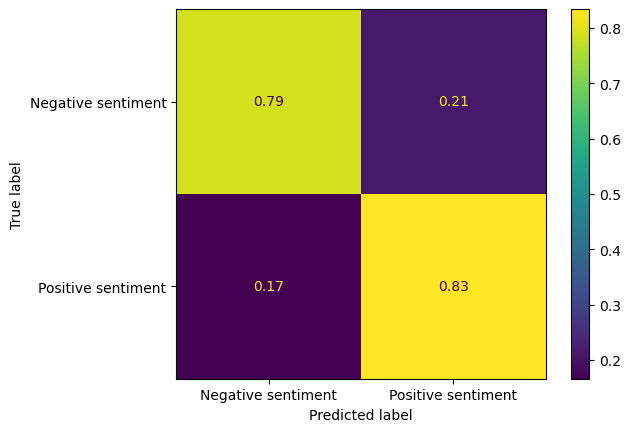

In [76]:
disp_LSVM3 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Negative sentiment", "Positive sentiment"])
disp_LSVM3.plot()

In [34]:
#STM selected
Randomized_search_SVM_STM_selected = RandomizedSearchCV(SVM, parameters_SVM, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_SVM_STM_selected.fit(STM_X_selected_train, STM_y_selected_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_SVM_STM_selected.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_SVM_STM_selected.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_SVM_STM_selected.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n LinearSVC(C=206.913808111479, class_weight='balanced', loss='hinge',
          random_state=101)
\n The best score across ALL searched params:\n 0.6354052662562726
\n The best parameters across ALL searched params:\n {'loss': 'hinge', 'class_weight': 'balanced', 'C': 206.913808111479}


c:\Users\victo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [35]:
#STM selected final
SVM_final_STM_selected = Randomized_search_SVM_STM_selected.best_estimator_
SVM_final_STM_selected.fit(STM_X_selected_train, STM_y_selected_train)
STM_y_selected_pred_SVM = SVM_final_STM_selected.predict(STM_X_selected_test)
#test score
f1_score(STM_y_selected_test, STM_y_selected_pred_SVM)

c:\Users\victo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6444859813084112

In [36]:
#BERTopic
Randomized_search_SVM_Bert = RandomizedSearchCV(SVM, parameters_SVM, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_SVM_Bert.fit(Bert_X_train, Bert_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_SVM_Bert.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_SVM_Bert.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_SVM_Bert.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n LinearSVC(C=0.615848211066026, class_weight='balanced', random_state=101)
\n The best score across ALL searched params:\n 0.41992654094857007
\n The best parameters across ALL searched params:\n {'loss': 'squared_hinge', 'class_weight': 'balanced', 'C': 0.615848211066026}


In [37]:
#BERT final 0.47, 0.42 reduction
SVM_final_Bert = Randomized_search_SVM_Bert.best_estimator_
SVM_final_Bert.fit(Bert_X_train, Bert_y_train)
Bert_y_pred_SVM = SVM_final_Bert.predict(Bert_X_test)
#test score
f1_score(Bert_y_test, Bert_y_pred_SVM)

0.4271523178807948

In [70]:
LSVM2 = LinearSVC(C=0.615848211066026, class_weight='balanced', random_state=101)

In [73]:
LSVM2.fit(Bert_X_train, Bert_y_train)
Bert_y_pred_SVM_cm = LSVM2.predict(Bert_X_test)
#test score
print(f1_score(Bert_y_test, Bert_y_pred_SVM_cm))
cm = confusion_matrix(Bert_y_test, Bert_y_pred_SVM_cm)
cm_norm = confusion_matrix(Bert_y_test, Bert_y_pred_SVM_cm, labels=[1,0], normalize="all")

0.4271523178807948


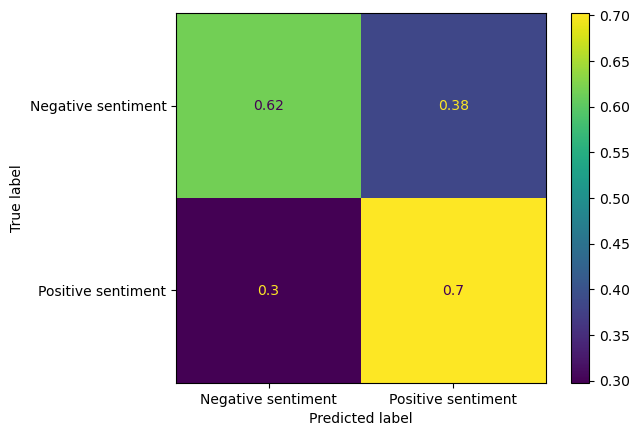

In [74]:
disp_LSVM = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=["Negative sentiment", "Positive sentiment"])
disp_LSVM.plot()

In [38]:
#Bertopic selected
Randomized_search_SVM_Bert_selected = RandomizedSearchCV(SVM, parameters_SVM, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_SVM_Bert_selected.fit(Bert_X_selected_train, Bert_y_selected_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_SVM_Bert_selected.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_SVM_Bert_selected.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_SVM_Bert_selected.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n LinearSVC(C=0.615848211066026, class_weight='balanced', random_state=101)
\n The best score across ALL searched params:\n 0.4045076545040772
\n The best parameters across ALL searched params:\n {'loss': 'squared_hinge', 'class_weight': 'balanced', 'C': 0.615848211066026}


In [39]:
#Bertopic selected final
SVM_final_Bert_selected = Randomized_search_SVM_Bert_selected.best_estimator_
SVM_final_Bert_selected.fit(Bert_X_selected_train, Bert_y_selected_train)
Bert_y_selected_pred_SVM = SVM_final_Bert_selected.predict(Bert_X_selected_test)
#test score
f1_score(Bert_y_selected_test, Bert_y_selected_pred_SVM)

0.4146341463414634

XGBClassifier

In [40]:
XGB = XGBClassifier(verbosity = 1, seed = 101, use_label_encoder=False)

In [41]:

parameters_XGB = {"colsample_bytree:": np.arange(0.5,1,0.1) ,"min_child_weight": np.arange(1,10,1), "eta": np.arange(0.01,0.3,0.05), "gamma": np.arange(0,5,1), "max_depth": np.arange(3,10,1), "subsample": np.arange(0.5,1,0.1), "scale_pos_weight": [1, 4.045069258], "objective": ["binary:logistic", "binary:logitraw", "binary:hinge"]}

In [42]:
#BOW
Randomized_search_XGB = RandomizedSearchCV(XGB, parameters_XGB, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_XGB.fit(bow_X_train, bow_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_XGB.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_XGB.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_XGB.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[12:31:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:31:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              c

In [43]:
#BOW final
XGB_final_BOW = Randomized_search_XGB.best_estimator_
XGB_final_BOW.fit(bow_X_train, bow_y_train)
bow_y_pred_XGB = XGB_final_BOW.predict(bow_X_test)
#test score
f1_score(bow_y_test, bow_y_pred_XGB)

[12:31:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:31:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6516853932584269

In [44]:
#STM
Randomized_search_XGB_STM = RandomizedSearchCV(XGB, parameters_XGB, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_XGB_STM.fit(STM_X_train, STM_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_XGB_STM.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_XGB_STM.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_XGB_STM.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[12:40:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:40:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              c

In [45]:
#STM final
XGB_final_STM = Randomized_search_XGB_STM.best_estimator_
XGB_final_STM.fit(STM_X_train, STM_y_train)
XGB_y_pred_STM = XGB_final_STM.predict(STM_X_test)
#test score
f1_score(STM_y_test, XGB_y_pred_STM)

[12:40:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:40:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6522476675148431

In [46]:
#STM selected
Randomized_search_XGB_STM_selected = RandomizedSearchCV(XGB, parameters_XGB, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_XGB_STM_selected.fit(STM_X_selected_train, STM_y_selected_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_XGB_STM_selected.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_XGB_STM_selected.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_XGB_STM_selected.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\victo\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:47:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              colsample_

In [47]:
#STM selected final
XGB_final_STM_selected = Randomized_search_XGB_STM_selected.best_estimator_
XGB_final_STM_selected.fit(STM_X_selected_train, STM_y_selected_train)
STM_y_selected_pred_XGB = XGB_final_STM_selected.predict(STM_X_selected_test)
#test score
f1_score(STM_y_selected_test, STM_y_selected_pred_XGB)

[12:47:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6528013582342953

In [48]:
#BERTopic
Randomized_search_XGB_Bert = RandomizedSearchCV(XGB, parameters_XGB, verbose=2, scoring="f1", n_jobs = 2)
Randomized_search_XGB_Bert.fit(Bert_X_train, Bert_y_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_XGB_Bert.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_XGB_Bert.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_XGB_Bert.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[12:52:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:52:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              col

In [49]:
#BERT final
XGB_final_Bert = Randomized_search_XGB_Bert.best_estimator_
XGB_final_Bert.fit(Bert_X_train, Bert_y_train)
Bert_y_pred_XGB = XGB_final_Bert.predict(Bert_X_test)
#test score
f1_score(Bert_y_test, Bert_y_pred_XGB)

[12:53:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:53:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.42906976744186054

In [50]:
#Bertopic selected
Randomized_search_XGB_Bert_selected = RandomizedSearchCV(XGB, parameters_XGB, verbose=1, scoring="f1", n_jobs = 2)
Randomized_search_XGB_Bert_selected.fit(Bert_X_selected_train, Bert_y_selected_train)
print(" Results from Randomized Search " )
print("\\n The best estimator across ALL searched params:\\n",Randomized_search_XGB_Bert_selected.best_estimator_)
print("\\n The best score across ALL searched params:\\n",Randomized_search_XGB_Bert_selected.best_score_)
print("\\n The best parameters across ALL searched params:\\n",Randomized_search_XGB_Bert_selected.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\victo\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:57:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:57:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Randomized Search 
\n The best estimator across ALL searched params:\n XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, colsample_bytree:=0.5,

In [51]:
#Bertopic selected final
XGB_final_Bert_selected = Randomized_search_XGB_Bert_selected.best_estimator_
XGB_final_Bert_selected.fit(Bert_X_selected_train, Bert_y_selected_train)
Bert_y_selected_pred_XGB = XGB_final_Bert_selected.predict(Bert_X_selected_test)
#test score
f1_score(Bert_y_selected_test, Bert_y_selected_pred_XGB)

[12:58:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "colsample_bytree:" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:58:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.45103092783505155